<a href="https://colab.research.google.com/github/henrygas/unsupervised_learning/blob/master/t_SNE_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 装载google云盘

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 定位当前工作目录

In [0]:
import os
os.chdir("./drive/My Drive/app/t-SNE_test")

In [4]:
!ls

data  model  out


## 3. 读取数据，并获取前10000行数据

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

data_path = "./data/Otto_train.csv"
data = pd.read_csv(data_path)
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [6]:
data.shape

(61878, 95)

In [7]:
data_use, data_del = train_test_split(data, train_size=10000, random_state=0)
data_use.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
7897,7898,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
11287,11288,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
10355,10356,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,Class_2
13438,13439,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,Class_2
54129,54130,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Class_8


In [8]:
data_use = data_use.reset_index(drop=True)
data_use.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,7898,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
1,11288,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
2,10356,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,Class_2
3,13439,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,Class_2
4,54130,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Class_8


In [9]:
data_use.shape

(10000, 95)

## 4. 对前10000行数据进行t-SNE降维处理，得到降维后的结果

In [10]:
id = data_use["id"]
target = data_use["target"]
X_train = data_use.drop(["id", "target"], axis=1)
X_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.manifold import TSNE

t_SNE = TSNE(n_components=2, perplexity=300, early_exaggeration=100, learning_rate=200.0)
X_train_TSNE = t_SNE.fit_transform(X_train)
t_SNE.kl_divergence_

0.9579530954360962

In [13]:
X_train_TSNE.shape

(10000, 2)

In [14]:
X_train_TSNE[:10]

array([[ -5.3409   ,   4.387675 ],
       [-12.326709 ,  -3.6387887],
       [  7.4885755,  -2.5719352],
       [-12.096634 ,  -0.9910166],
       [  7.00396  ,  20.0006   ],
       [ -6.809832 , -10.547211 ],
       [-16.75382  , -24.102047 ],
       [ -8.448259 , -35.119987 ],
       [-13.444921 ,   7.694057 ],
       [-14.094679 , -25.895311 ]], dtype=float32)

## 5. 画出t-SNE变换的后的结果

In [15]:
TSNE_feature_names = list()
for i in range(X_train_TSNE.shape[1]):
  TSNE_feature_names.append("feature_{}".format(i))

X_train_TSNE_df = pd.DataFrame(data=X_train_TSNE, columns=TSNE_feature_names)
labeled_df = pd.concat([X_train_TSNE_df, target], axis=1)
labeled_df.head()

,feature_0,feature_1,target
0,-5.340900,4.387675,Class_2
1,-12.326709,-3.638789,Class_2
2,7.488575,-2.571935,Class_2
3,-12.096634,-0.991017,Class_2
4,7.003960,20.000601,Class_8


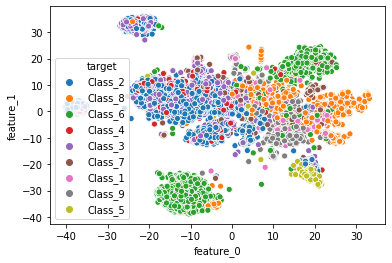

In [16]:
import seaborn as sns

sns.scatterplot(x="feature_0", y="feature_1", hue="target", data=labeled_df)
plt.xlabel("feature_0")
plt.ylabel("feature_1")
plt.show()

In [0]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from functools import wraps
import threading
from concurrent.futures import ThreadPoolExecutor

def log_search_time_cost(name=None):
  def decorator(func):
    @wraps(func)
    def _do_log(*args, **xargs):
      print("starting searching {}".format(xargs[name]))
      start_time = time.time()
      func(*args, **xargs)
      time_cost = time.time() - start_time
      print("ending searching {}, time_cost:{:.4f}秒\n".format(xargs[name], time_cost))

    return _do_log

  return decorator


class SearchParam:
  def __init__(self, perplexity, early_exaggeration, learning_rate, n_iter):
    self.perplexity_ = perplexity
    self.early_exaggeration_ = early_exaggeration
    self.learning_rate_ = learning_rate
    self.n_iter_ = n_iter

  def name(self):
    return "[perplexity={} early_exaggeration={} learning_rate={} n_iter={}]".format(
        self.perplexity_, self.early_exaggeration_, self.learning_rate_, self.n_iter_
    )

class TSNESearchUnit:
  def __init__(self, X, y, search_param):
    self.X_ = X
    self.y_ = y
    self.search_param_ = search_param
    self.search_name_ = self.search_param_.name()


  @log_search_time_cost(name="search_name")
  def search(self, search_name=None):
    self._single_search()

  def _single_search(self):
    """
    一次搜索
    :param perplexity: 混乱度, 表示优化过程中考虑邻近点的多少
    :param early_exaggeration: 嵌入空间簇间距的大小，默认为12
    :param learning_rate: 学习率，表示梯度下降的快慢，默认200
    :param n_iter: 迭代次数
    """

    perplexity, early_exaggeration, learning_rate, n_iter = self.search_param_.perplexity_, \
                                   self.search_param_.early_exaggeration_, \
                                   self.search_param_.learning_rate_, \
                                   self.search_param_.n_iter_

    each_tsne = TSNE(n_components=2, 
                     perplexity=perplexity, 
                     early_exaggeration=early_exaggeration, 
                     learning_rate=learning_rate, 
                     n_iter=n_iter)
    each_X = each_tsne.fit_transform(self.X_)

    feature_names = list()
    for i in range(each_X.shape[1]):
      feature_names.append("feature_{}".format(i))
    
    each_X_df = pd.DataFrame(data=each_X, columns=feature_names)
    each_df = pd.concat([each_X_df, self.y_], axis=1)

    title = "perplexity={}, early_exaggeration={}, learning_rate={}, n_iter={}".format(
        perplexity, early_exaggeration, learning_rate, n_iter
    )

    pic_name = "p-{}_e-{}_l-{}_n-{}".format(perplexity, early_exaggeration, learning_rate, n_iter)

    self._draw(each_df, title, pic_name)
    print("完成一个！！！")

  def _draw(self, each_df, title, pic_name):
    plt.subplots()
    sns.scatterplot(x="feature_0", y="feature_1", hue="target", data=each_df)
    plt.title(title)
    plt.xlabel("feature_0")
    plt.ylabel("feature_1")
    plt.savefig("./out/{}.png".format(pic_name))


class SearchThread(threading.Thread):
  def __init__(self, search):
    super(SearchThread, self).__init__()
    self.search_ = search

  def run(self):
    self.search_.search(search_name=self.search_.search_name_)


def search_once(search_unit):
  search_unit.search(search_name=search_unit.search_name_)

perplexities = [30, 100, 500]
early_exaggerations = [12, 100, 500]
learning_rates = [200, 10, 500]
n_iteres = [1000, 2000, 3000]

tasks = list()
for perplexity in perplexities:
  for early_exaggeration in early_exaggerations:
    for learning_rate in learning_rates:
      for n_iter in n_iteres:
        search_param = SearchParam(perplexity, early_exaggeration, learning_rate, n_iter)
        search_unit = TSNESearchUnit(X_train, target, search_param)
        search_once(search_unit)

for task in tasks:
  task.result()

print("All Over!")

starting searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=1000]
完成一个！！！
ending searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=1000], time_cost:125.9501秒

starting searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=2000]
完成一个！！！
ending searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=2000], time_cost:219.0634秒

starting searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=3000]
完成一个！！！
ending searching [perplexity=30 early_exaggeration=12 learning_rate=200 n_iter=3000], time_cost:317.3880秒

starting searching [perplexity=30 early_exaggeration=12 learning_rate=10 n_iter=1000]
完成一个！！！
ending searching [perplexity=30 early_exaggeration=12 learning_rate=10 n_iter=1000], time_cost:120.7679秒

starting searching [perplexity=30 early_exaggeration=12 learning_rate=10 n_iter=2000]
完成一个！！！
ending searching [perplexity=30 early_exaggeration=12 learning_rate=10 n_iter=2000], time_cost:221.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=200 n_iter=3000], time_cost:331.0356秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=1000], time_cost:148.3912秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=2000], time_cost:268.2290秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=10 n_iter=3000], time_cost:400.8282秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=1000], time_cost:136.1449秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=2000], time_cost:235.7211秒

starting searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=30 early_exaggeration=500 learning_rate=500 n_iter=3000], time_cost:341.6793秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=1000], time_cost:163.6333秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=2000], time_cost:294.9959秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=200 n_iter=3000], time_cost:430.9713秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=1000], time_cost:159.5334秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=2000], time_cost:294.7656秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=10 n_iter=3000], time_cost:433.3698秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=1000], time_cost:169.0882秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=2000], time_cost:302.5136秒

starting searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=12 learning_rate=500 n_iter=3000], time_cost:429.2366秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=1000], time_cost:188.0710秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=2000], time_cost:330.8482秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=200 n_iter=3000], time_cost:450.2752秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=1000], time_cost:161.2984秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=2000], time_cost:302.7048秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=10 n_iter=3000], time_cost:431.5645秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=1000], time_cost:191.3594秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=2000], time_cost:323.9209秒

starting searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=100 learning_rate=500 n_iter=3000], time_cost:460.4915秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=1000], time_cost:188.7316秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=2000], time_cost:313.4260秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=200 n_iter=3000], time_cost:451.3919秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=1000], time_cost:49.9845秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=2000], time_cost:51.6042秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=10 n_iter=3000], time_cost:50.2437秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=1000], time_cost:193.7552秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=2000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=2000], time_cost:338.5227秒

starting searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=3000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


完成一个！！！
ending searching [perplexity=100 early_exaggeration=500 learning_rate=500 n_iter=3000], time_cost:478.6822秒

starting searching [perplexity=500 early_exaggeration=12 learning_rate=200 n_iter=1000]
